In [26]:
import matplotlib.pyplot as plt
import numpy as np

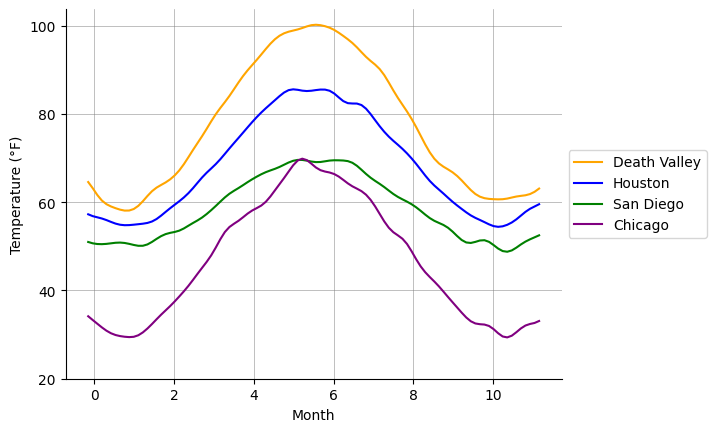

In [27]:
from scipy.ndimage import gaussian_filter1d

_rng = np.random.default_rng(2024_04_28)

x = np.pi + 12 / 8 * np.linspace(-0.7 * np.pi, np.pi + 0.7 * np.pi, 100)

death_valley = 20 * np.sin(8 / 12 * (x - np.pi)) + 80
houston = 15 * np.sin(8 / 12 * (x - np.pi)) + 70
san_diego = 10 * np.sin(8 / 12 * (x - np.pi)) + 60
chicago = 20 * np.sin(8 / 12 * (x - np.pi)) + 50

# Adding scaled down noise
noise_scale = 2  # Scale down the noise
death_valley_noise = _rng.normal(0, noise_scale, size=x.size)
houston_noise = _rng.normal(0, noise_scale, size=x.size)
san_diego_noise = _rng.normal(0, noise_scale, size=x.size)
chicago_noise = _rng.normal(0, noise_scale * 1.5, size=x.size)

# Smoothing the noise
death_valley += gaussian_filter1d(death_valley_noise, sigma=2)
houston += gaussian_filter1d(houston_noise, sigma=2)
san_diego += gaussian_filter1d(san_diego_noise, sigma=2)
chicago += gaussian_filter1d(chicago_noise, sigma=2)


plt.plot(x, death_valley, label = "Death Valley", c = "orange")
plt.plot(x, houston, label = "Houston", c = "blue")
plt.plot(x, san_diego, label ="San Diego", c = "green")
plt.plot(x, chicago, label = "Chicago", c = "purple")

plt.grid(True, which='both', linewidth=0.5, color='grey', alpha=0.7)

plt.ylabel("Temperature (°F)")
plt.xlabel("Month")

plt.yticks(np.arange(20, 110, 20))

plt.gca().spines[["top", "right"]].set_visible(False)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("imgs/2_3.png", bbox_inches="tight", dpi=300)

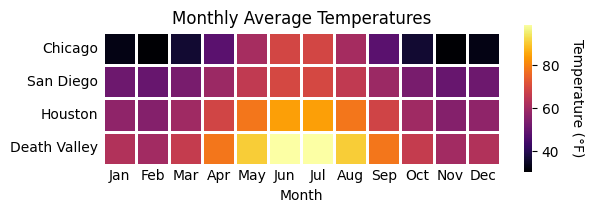

In [74]:
from matplotlib.colorbar import Colorbar
import seaborn as sns

x_integer = np.arange(12)

death_valley_integer = 20 * np.sin(8 / 12 * (x_integer - np.pi)) + 80
houston_integer = 15 * np.sin(8 / 12 * (x_integer - np.pi)) + 70
san_diego_integer = 10 * np.sin(8 / 12 * (x_integer - np.pi)) + 60
chicago_integer = 20 * np.sin(8 / 12 * (x_integer - np.pi)) + 50

# Combine the data into a 2D array
data = np.array([death_valley_integer, houston_integer, san_diego_integer, chicago_integer])

# Create the heatmap without annotations, in square cells with a small line separating them
heatmap = sns.heatmap(data, annot=False, square=True, cmap="inferno", linewidths=2,
            yticklabels=["Death Valley", "Houston", "San Diego", "Chicago"],
            xticklabels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"],
            cbar_kws={"shrink": 0.4})

plt.gca().invert_yaxis()

plt.tick_params(axis="both", which="both", length=0)

cbar = heatmap.collections[0].colorbar
cbar.set_label("Temperature (°F)", rotation=270)
cbar.ax.yaxis.set_label_coords(8, 0.5)

plt.title("Monthly Average Temperatures")
plt.xlabel("Month")
plt.savefig("imgs/2_4.png", bbox_inches="tight", dpi=300)